# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATASET

In [2]:
# Keep the file in same folder where the python book is to read the data
missing_values = ["n/a", "na", "--","XNA","NA","-"]
df_country = pd.read_csv("Country-data.csv",na_values = missing_values)

### EDA

In [3]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Checking export and import contries
df_country[ (df_country['exports']>90) | (df_country['imports']>90) ]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170
88,Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


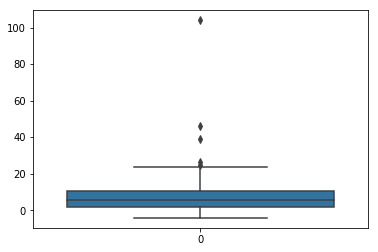

In [7]:
#Checking for inflation
sns.boxplot(data = df_country['inflation'])

In [8]:
df_country[df_country['inflation']>30]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500


In [9]:
df_country = df_country[df_country['country'] != 'Nigeria']
df_country.reset_index(inplace = True)

In [10]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 11 columns):
index         166 non-null int64
country       166 non-null object
child_mort    166 non-null float64
exports       166 non-null float64
health        166 non-null float64
imports       166 non-null float64
income        166 non-null int64
inflation     166 non-null float64
life_expec    166 non-null float64
total_fer     166 non-null float64
gdpp          166 non-null int64
dtypes: float64(7), int64(3), object(1)
memory usage: 14.3+ KB


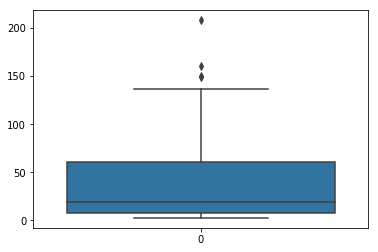

In [11]:
#Checking for child_mort
sns.boxplot(data = df_country['child_mort'])

In [12]:
df_country.describe()

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,82.819277,37.717470,41.204211,6.826205,47.067867,17216.945783,7.202205,70.616265,2.930542,13028.216867
std,48.442567,39.811762,27.467227,2.751775,24.173412,19313.701711,7.481329,8.885455,1.501542,18365.400475
min,0.000000,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,41.250000,8.075000,23.800000,4.915000,30.475000,3347.500000,1.790000,65.325000,1.792500,1320.000000
50%,82.500000,19.250000,35.200000,6.325000,43.300000,10180.000000,5.265000,73.150000,2.395000,4670.000000
75%,124.750000,61.200000,51.375000,8.625000,58.825000,22850.000000,10.475000,76.800000,3.847500,14325.000000
max,166.000000,208.000000,200.000000,17.900000,174.000000,125000.000000,45.900000,82.800000,7.490000,105000.000000


In [13]:
df_country[df_country['child_mort']>140]

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
32,32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
66,66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
131,132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399


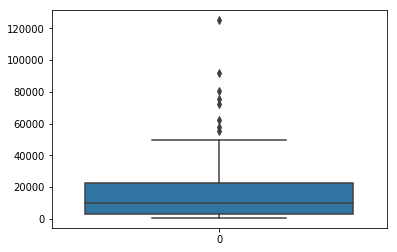

In [14]:
# Checking outliers for income
sns.boxplot(data = df_country['income'])

In [15]:
df_country[df_country['income']>60000]

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
113,114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
122,123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
132,133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


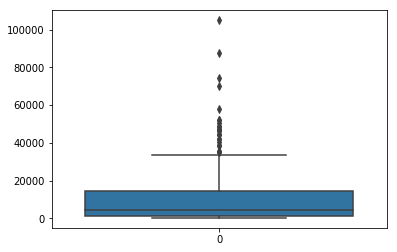

In [16]:
# Checking outliers for GDP
sns.boxplot(data = df_country['gdpp'])

In [17]:
df_country[df_country['income']>35000]

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
11,11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
15,15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
44,44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
53,53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
54,54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
58,58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800


=> After checking the columns we conclude that though there are outliers , we could not find any data points which seems practically incorrect or offf the mark or data entry mistake.As our business objective is to specifcally find and  target such countries whose macro economic parameters are off the trend it is better to keep all data

# MODEL BUILDING

In [18]:
# Checking correlation matrix

In [19]:
corr = df_country.corr()

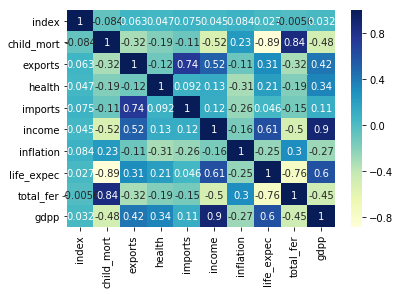

In [20]:
sns.heatmap(corr, annot = True, cmap="YlGnBu")

### 1. SCALING THE DATA

In [21]:
# importing required libraries
from sklearn.preprocessing import StandardScaler

In [22]:
#initializing the scaler

scaler = StandardScaler()

# Remvoing country column from orignal data set and storing in y

y = df_country.pop('country')

In [23]:
# Scaling the numerical columns
df_country_scal = scaler.fit_transform(df_country)

In [24]:
df_country_scal[:5,:5]

array([[-1.71481139,  1.32225568, -1.13948986,  0.2747594 , -0.08995115],
       [-1.69410593, -0.53203789, -0.48218058, -0.10067704,  0.06357269],
       [-1.67340046, -0.26245988, -0.10240188, -0.96819039, -0.65010572],
       [-1.652695  ,  2.04784881,  0.77035878, -1.44933225, -0.17293701],
       [-1.63198954, -0.69076139,  0.15687012, -0.29021778,  0.49094989]])

In [25]:
df_country_scal.shape

(166, 10)

### 2. PCA

In [26]:
#importing necessary libraries
from sklearn.decomposition import PCA

In [27]:
pca = PCA(random_state=100)

In [28]:
pca.fit(df_country_scal)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.components_

array([[ 3.17074808e-02, -4.16563635e-01,  2.82708521e-01,
         1.52679033e-01,  1.57298438e-01,  3.99664045e-01,
        -1.95922325e-01,  4.26180609e-01, -4.01491070e-01,
         3.95663599e-01],
       [ 9.74818837e-02,  1.92724080e-01,  6.09266020e-01,
        -2.32320982e-01,  6.71518425e-01,  2.54990867e-02,
         7.00597026e-04, -2.22273811e-01,  1.59517516e-01,
        -4.16823092e-02],
       [ 1.66493346e-01, -1.38221810e-01,  1.28853730e-01,
        -6.22272945e-01, -2.65424150e-01,  2.03496574e-01,
         6.44061899e-01,  1.39427191e-01, -5.68440179e-02,
         2.16935580e-04],
       [ 9.09471063e-01,  3.36854058e-02, -7.72506451e-02,
         3.42641864e-01,  2.79150936e-03,  3.51259094e-02,
         1.32558101e-01, -6.04486953e-02,  1.22635986e-01,
         1.04161740e-01],
       [-2.35779174e-01,  3.76275392e-01,  4.04195337e-02,
         1.62346845e-01, -1.89438484e-01,  4.87662779e-01,
         1.31425691e-01, -1.84281213e-01,  3.78419594e-01,
         5.

In [30]:
pca.explained_variance_ratio_ *100

array([41.30192251, 15.62695394, 12.25128361, 10.24576441,  9.66679084,
        6.01698138,  2.26704993,  1.12325638,  0.82776201,  0.672235  ])

<BarContainer object of 10 artists>

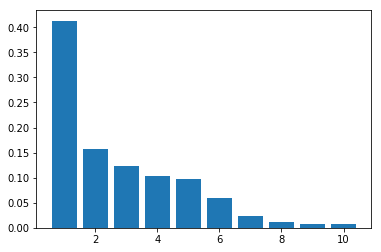

In [31]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [32]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

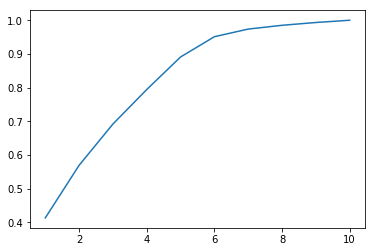

In [33]:
#SCREE PLOT
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [34]:
# Doing PCA with 5 components

In [35]:
pca2 = PCA(n_components = 5, random_state=100)

In [36]:
# Doing PCA and tranforming the data
finaldata = pca2.fit_transform(df_country_scal)

In [37]:
finaldata.shape

(166, 5)

In [38]:
# Making dataframe of final cluster
df_country_final = pd.DataFrame(finaldata, columns = ['PC1','PC2','PC3','PC4','PC5'])

In [39]:
df_country_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
PC1    166 non-null float64
PC2    166 non-null float64
PC3    166 non-null float64
PC4    166 non-null float64
PC5    166 non-null float64
dtypes: float64(5)
memory usage: 6.6 KB


In [40]:
# Appeding country name to final dataframe for cluster
df_country_cluster = pd.concat([df_country_final,y], axis =1)

In [41]:
#sns.pairplot(data=df_country_cluster, x_vars=["PC1"], y_vars=["PC2"], hue = "country", size=5)

In [42]:
# Checking correlation of final data
df_country_cluster.corr()

,PC1,PC2,PC3,PC4,PC5
PC1,1.000000e+00,1.948101e-17,-8.979107e-17,-1.300483e-17,5.556278e-17
PC2,1.948101e-17,1.000000e+00,-7.008776e-17,3.277061e-17,3.319355e-17
PC3,-8.979107e-17,-7.008776e-17,1.000000e+00,-2.531075e-16,-1.453454e-16
PC4,-1.300483e-17,3.277061e-17,-2.531075e-16,1.000000e+00,8.265972e-17
PC5,5.556278e-17,3.319355e-17,-1.453454e-16,8.265972e-17,1.000000e+00


### 3. CLUSTER ANALYSIS

In [43]:
# importing necessary libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


For n_clusters=2, the silhouette score is 0.2759090696964822
For n_clusters=3, the silhouette score is 0.27142197270523
For n_clusters=4, the silhouette score is 0.2802219791657146
For n_clusters=5, the silhouette score is 0.24710468254337584
For n_clusters=6, the silhouette score is 0.24564158971899433
For n_clusters=7, the silhouette score is 0.24001821030638726


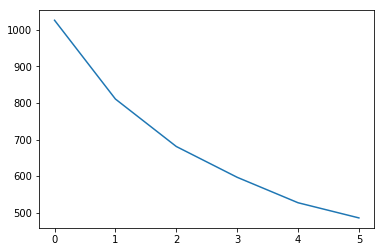

In [44]:
# range of clusters

ssd = []
range_n = [2,3,4,5,6,7]

for clusters in range_n:
    kmeans = KMeans(n_clusters=clusters, max_iter=100)
    kmeans.fit(df_country_final)
    ssd.append(kmeans.inertia_)
    cluster_labels=kmeans.labels_
    
    
    # silhouette score
    silhouette_avg = silhouette_score(df_country_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(clusters, silhouette_avg))
   

plt.plot(ssd)

In [45]:
# final model with k=3
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(df_country_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
# Adding cluster label in orignal dataframe. Also adding country name
df_country['K_clusters'] =kmeans.labels_
df_country['country']=y

# Adding cluster label in PCA dataframe
df_country_cluster['K_clusters'] = kmeans.labels_

#### VINSUALATIONS ON K MEANS CLUSTERS TO INTERPRET RESULTS

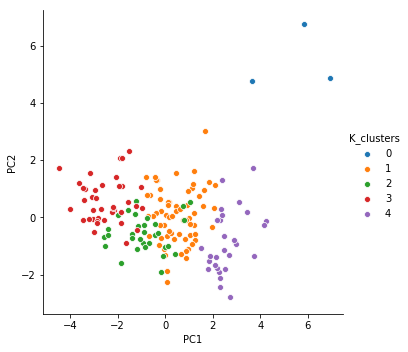

In [49]:
#Visualization on PC component
sns.pairplot(data=df_country_cluster, x_vars=["PC1"], y_vars=["PC2"], hue = "K_clusters", size=5)

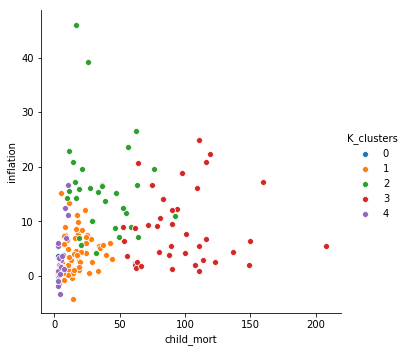

In [50]:
#Visualization on Orginal data
sns.pairplot(data=df_country, x_vars=["child_mort"], y_vars=["inflation"], hue = "K_clusters", size=5)

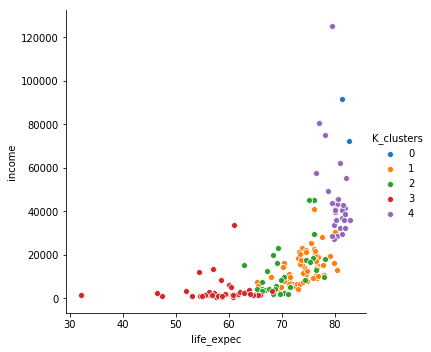

In [51]:
#Visualization on Orginal data
sns.pairplot(data=df_country, x_vars=["life_expec"], y_vars=["income"], hue = "K_clusters", size=5)

In [107]:
df_country.groupby('K_clusters').mean()

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,H_clusters_3
K_clusters,,,,,,,,,,,
0,107.333333,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,2.000000
1,79.609375,17.909375,45.185938,6.843438,55.125000,12831.718750,4.288297,73.460937,2.171094,7439.937500,0.296875
2,93.870968,37.493548,29.583194,4.801935,28.150513,12288.387097,16.099355,70.516129,3.035161,5453.806452,0.129032
3,75.948718,97.325641,30.192821,6.610256,46.069231,3503.666667,8.603205,57.930769,5.042564,1714.358974,0.000000
4,84.793103,4.982759,45.703448,9.245862,39.513793,45762.068966,2.727793,80.386207,1.814828,44065.517241,0.965517


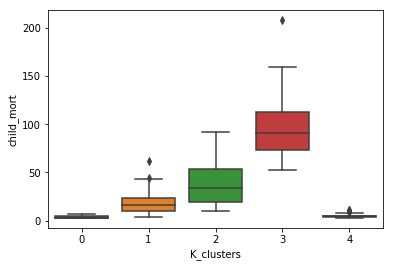

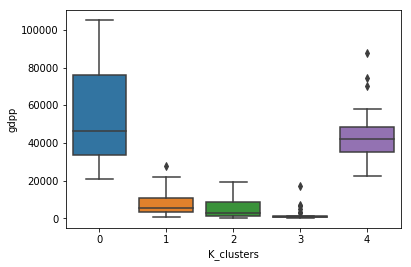

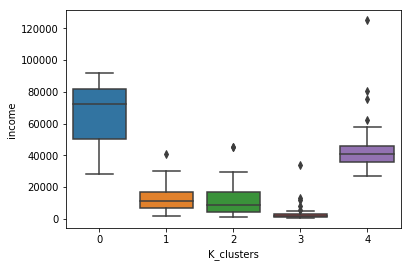

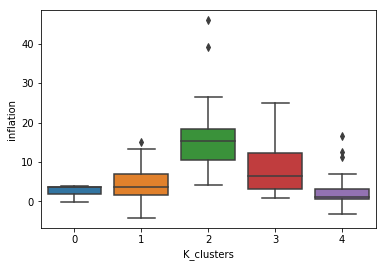

In [53]:
sns.boxplot(data= df_country, x='K_clusters', y='child_mort')
plt.show()
sns.boxplot(data= df_country, x='K_clusters', y='gdpp')
plt.show()
sns.boxplot(data= df_country, x='K_clusters', y='income')
plt.show()
sns.boxplot(data= df_country, x='K_clusters', y='')
plt.show()

## HIRARCHICHAL CLUSTERING

In [54]:
#Importing required libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

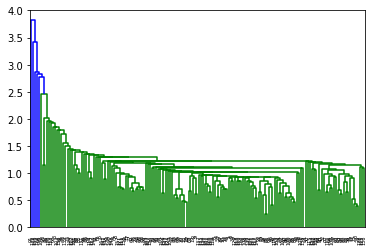

In [55]:
# Single linkage
mergings = linkage(df_country_final, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

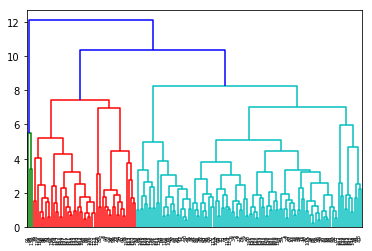

In [56]:
# Complete linkage
mergings = linkage(df_country_final, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [58]:
# Complete linkage gives more appealing dendogram. Hence using it
# Dendogram shows 3 clusters .Taking 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [60]:
# Adding cluster label in orignal dataframe
df_country['H_clusters_3'] =cluster_labels

# Adding cluster label in PCA dataframe
df_country_cluster['H_clusters_3'] = cluster_labels

In [61]:
df_country.head()

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_clusters,country,H_clusters_3
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,Afghanistan,0
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,Albania,0
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,Algeria,0
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,Angola,0
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,Antigua and Barbuda,0


#### VINSUALATIONS ON HIRARCHICAL CLUSTERS TO INTERPRET RESULTS

In [63]:
df_country[df_country['H_clusters_3'] == 2]

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_clusters,country,H_clusters_3
91,91,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,0,Luxembourg,2
98,98,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,0,Malta,2
132,133,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,0,Singapore,2


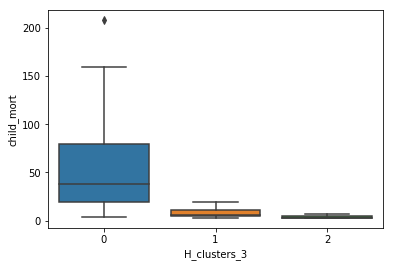

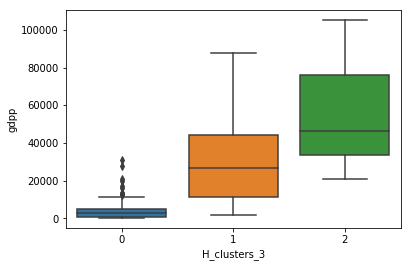

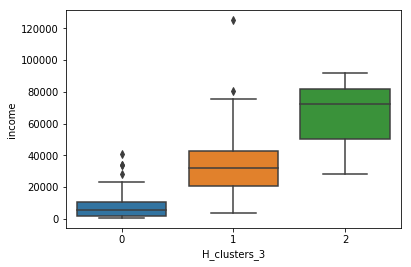

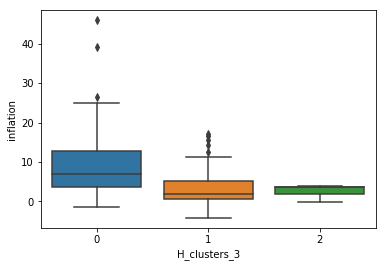

In [64]:
sns.boxplot(data= df_country, x='H_clusters_3', y='child_mort')
plt.show()
sns.boxplot(data= df_country, x='H_clusters_3', y='gdpp')
plt.show()
sns.boxplot(data= df_country, x='H_clusters_3', y='income')
plt.show()
sns.boxplot(data= df_country, x='H_clusters_3', y='inflation')
plt.show()

In [65]:
df_country.groupby('H_clusters_3').mean()

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_clusters
H_clusters_3,,,,,,,,,,,
0,75.901786,52.308929,33.666062,6.207054,43.955946,8000.919643,8.992455,66.882143,3.472054,4365.035714,1.964286
1,96.568627,7.649020,49.829412,8.187843,47.454902,34702.156863,3.549157,78.180392,1.832549,29433.333333,2.725490
2,107.333333,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,0.000000


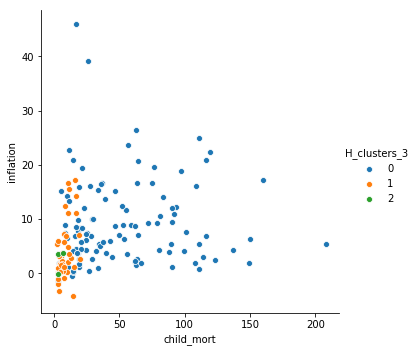

In [66]:
#Visualization on Orginal data
sns.pairplot(data=df_country, x_vars=["child_mort"], y_vars=["inflation"], hue = "H_clusters_3", size=5)

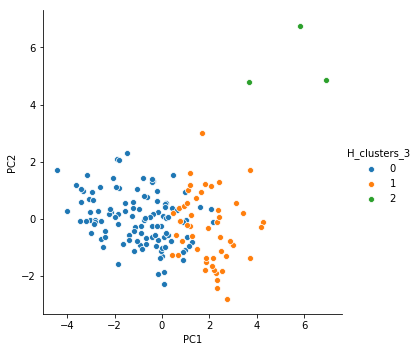

In [69]:
#Visualization on PCA
sns.pairplot(data=df_country_cluster, x_vars=["PC1"], y_vars=["PC2"], hue = "H_clusters_3", size=5)

### COMPARING RESULTS OF K MEANS AND HIERARCHICAL 

In [106]:

#df_country[(df_country['K_clusters'] == 3) | (df_country['K_clusters'] == 2)]

df_country[df_country['K_clusters']==3].sort_values(by = ['child_mort'], axis = 0, ascending = False)

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_clusters,country,H_clusters_3
66,66,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,3,Haiti,0
131,132,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,3,Sierra Leone,0
32,32,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,3,Chad,0
31,31,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3,Central African Republic,0
97,97,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708,3,Mali,0
112,112,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,3,Niger,0
3,3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,3,Angola,0
37,37,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,3,"Congo, Dem. Rep.",0
25,25,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3,Burkina Faso,0
64,64,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,3,Guinea-Bissau,0


In [83]:
df_country.groupby('K_clusters').count()

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,H_clusters_3
K_clusters,,,,,,,,,,,,
0,3,3,3,3,3,3,3,3,3,3,3,3
1,64,64,64,64,64,64,64,64,64,64,64,64
2,31,31,31,31,31,31,31,31,31,31,31,31
3,39,39,39,39,39,39,39,39,39,39,39,39
4,29,29,29,29,29,29,29,29,29,29,29,29


In [85]:
df_country.groupby('H_clusters_3').count()

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_clusters,country
H_clusters_3,,,,,,,,,,,,
0,112,112,112,112,112,112,112,112,112,112,112,112
1,51,51,51,51,51,51,51,51,51,51,51,51
2,3,3,3,3,3,3,3,3,3,3,3,3


In [105]:

df_country[df_country['H_clusters_3']==0].sort_values(by = ['child_mort'], axis = 0, ascending = False)

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_clusters,country,H_clusters_3
66,66,208.0,15.300,6.91,64.7000,1500,5.450,32.1,3.33,662,3,Haiti,0
131,132,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399,3,Sierra Leone,0
32,32,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,3,Chad,0
31,31,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,3,Central African Republic,0
97,97,137.0,22.800,4.98,35.1000,1870,4.370,59.5,6.55,708,3,Mali,0
112,112,123.0,22.200,5.16,49.1000,814,2.550,58.8,7.49,348,3,Niger,0
3,3,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,3,Angola,0
25,25,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,3,Burkina Faso,0
37,37,116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,3,"Congo, Dem. Rep.",0
64,64,114.0,14.900,8.50,35.2000,1390,2.970,55.6,5.05,547,3,Guinea-Bissau,0


In [109]:

df_country[df_country['H_clusters_3']==0].sort_values(by = ['child_mort'], axis = 0, ascending = False)['country'].head(10)

66                        Haiti
131                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
112                       Niger
3                        Angola
25                 Burkina Faso
37             Congo, Dem. Rep.
64                Guinea-Bissau
Name: country, dtype: object

In [111]:

df_country[df_country['K_clusters']==3].sort_values(by = ['child_mort'], axis = 0, ascending = False).head(10)

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_clusters,country,H_clusters_3
66,66,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,3,Haiti,0
131,132,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,3,Sierra Leone,0
32,32,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,3,Chad,0
31,31,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,3,Central African Republic,0
97,97,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,3,Mali,0
112,112,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,3,Niger,0
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,Angola,0
37,37,116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,3,"Congo, Dem. Rep.",0
25,25,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,3,Burkina Faso,0
64,64,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547,3,Guinea-Bissau,0
